In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_excel('/content/drive/MyDrive/VNP Project/vnp_dataset.xlsx')
df

,Series Name,Series Code,Country Name,Country Code,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,GDP per capita (current US$),NY.GDP.PCAP.CD,Afghanistan,AFG,637.087099,625.054942,565.56973,522.082216,525.469771,491.337221,496.602504,510.787063,356.496214,357.261153,415.707417
1,GDP per capita (current US$),NY.GDP.PCAP.CD,Albania,ALB,4413.063383,4578.633208,3952.803574,4124.05539,4531.032207,5365.489347,5460.428237,5370.778623,6413.283286,6846.426143,8575.171134
2,GDP per capita (current US$),NY.GDP.PCAP.CD,Algeria,DZA,5979.60139,6094.693923,4685.059027,4424.98529,4554.66754,4577.210292,4468.453419,3743.541952,4160.559267,4961.552577,5364.02795
3,GDP per capita (current US$),NY.GDP.PCAP.CD,American Samoa,ASM,11813.502203,12026.334493,12727.410265,12843.33429,11863.683945,12552.054687,12886.135952,14489.258656,15236.160488,18017.458938,..
4,GDP per capita (current US$),NY.GDP.PCAP.CD,Andorra,AND,42470.316116,44369.659691,38654.93472,40129.819201,40672.994335,42819.77458,41257.804585,37361.090067,42425.699676,42414.059009,46812.448449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2929,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isnull().sum()

,0
Series Name,3
Series Code,5
Country Name,5
Country Code,5
2013 [YR2013],5
2014 [YR2014],5
2015 [YR2015],5
2016 [YR2016],5
2017 [YR2017],5
2018 [YR2018],5


In [6]:
df.replace('..', np.nan, inplace=True)
df.dropna(inplace=True)

<ipython-input-6-3242027000>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('..', np.nan, inplace=True)


In [7]:
df.isnull().sum()

,0
Series Name,0
Series Code,0
Country Name,0
Country Code,0
2013 [YR2013],0
2014 [YR2014],0
2015 [YR2015],0
2016 [YR2016],0
2017 [YR2017],0
2018 [YR2018],0


In [8]:
df

,Series Name,Series Code,Country Name,Country Code,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,GDP per capita (current US$),NY.GDP.PCAP.CD,Afghanistan,AFG,637.087099,625.054942,565.569730,522.082216,525.469771,491.337221,496.602504,510.787063,356.496214,357.261153,415.707417
1,GDP per capita (current US$),NY.GDP.PCAP.CD,Albania,ALB,4413.063383,4578.633208,3952.803574,4124.055390,4531.032207,5365.489347,5460.428237,5370.778623,6413.283286,6846.426143,8575.171134
2,GDP per capita (current US$),NY.GDP.PCAP.CD,Algeria,DZA,5979.601390,6094.693923,4685.059027,4424.985290,4554.667540,4577.210292,4468.453419,3743.541952,4160.559267,4961.552577,5364.027950
4,GDP per capita (current US$),NY.GDP.PCAP.CD,Andorra,AND,42470.316116,44369.659691,38654.934720,40129.819201,40672.994335,42819.774580,41257.804585,37361.090067,42425.699676,42414.059009,46812.448449
5,GDP per capita (current US$),NY.GDP.PCAP.CD,Angola,AGO,5057.747878,5005.999741,3213.902611,1807.952941,2437.259712,2538.591391,2189.855714,1449.922867,1925.874661,2929.694455,2308.159767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2658,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,Upper middle income,UMC,74.667393,74.921574,75.171971,75.336208,75.476967,75.817900,76.025789,75.229347,74.720034,76.003468,76.194809
2659,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,World,WLD,71.531914,71.775451,71.964577,72.184626,72.365025,72.642859,72.867669,72.182767,71.215376,72.968739,73.327475
2706,Gini index,SI.POV.GINI,Costa Rica,CRI,49.200000,48.600000,48.400000,48.700000,48.300000,48.000000,48.200000,49.200000,48.700000,47.200000,46.700000
2717,Gini index,SI.POV.GINI,Ecuador,ECU,46.900000,45.000000,46.000000,45.000000,44.700000,45.400000,45.700000,47.300000,45.800000,45.500000,44.600000


In [9]:
# Filter only GDP per capita series
gdp_df = df[df['Series Code'] == 'NY.GDP.PCAP.CD']

In [10]:
# Set years
years = [str(y) + " [YR" + str(y) + "]" for y in range(2013, 2024)]  # 2013–2023

In [11]:
# Prepare time series features (previous 3 years to predict next)
def create_features_targets(data, years, n_lag=3):
    X, y = [], []
    countries = []
    for i in range(n_lag, len(years)):
        x_cols = years[i - n_lag:i]
        y_col = years[i]
        for _, row in data.iterrows():
            if pd.notnull(row[x_cols]).all() and pd.notnull(row[y_col]):
                X.append(row[x_cols].values.astype(float))
                y.append(row[y_col])
                countries.append(row['Country Name'])
    return np.array(X), np.array(y), countries

In [12]:
X, y, countries = create_features_targets(gdp_df, years, n_lag=3)

In [13]:
# Split into training and testing (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# XGBoost model
model = xgb.XGBRegressor(max_depth=2, objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [15]:
# Prediction and evaluation
y_pred = model.predict(X_test)

In [16]:
# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
min_error = np.min(np.abs(y_test - y_pred))
max_error = np.max(np.abs(y_test - y_pred))
mae = mean_absolute_error(y_test, y_pred)

In [17]:
print("Evaluation Metrics:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Min Error: {min_error:.2f}")
print(f"Max Error: {max_error:.2f}")
print(f"MAE: {mae:.2f}")

Evaluation Metrics:
RMSE: 3053.04
R² Score: 0.9830
Min Error: 1.54
Max Error: 29682.94
MAE: 1302.14


In [18]:
# Forecast 2024 based on 2021–2023
forecast_years = ['2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]']
X_forecast = []
forecast_countries = []

for _, row in gdp_df.iterrows():
    if pd.notnull(row[forecast_years]).all():
        X_forecast.append(row[forecast_years].values.astype(float))
        forecast_countries.append(row['Country Name'])

In [19]:
X_forecast = np.array(X_forecast)
y_forecast_2024 = model.predict(X_forecast)

In [20]:
# Create DataFrame for forecast
forecast_df = pd.DataFrame({
    'Country': forecast_countries,
    'Predicted GDP per capita 2024': y_forecast_2024
})

display(forecast_df)

,Country,Predicted GDP per capita 2024
0,Afghanistan,599.550598
1,Albania,8355.367188
2,Algeria,5974.988770
3,Andorra,49189.671875
4,Angola,2433.099365
...,...,...
238,Sub-Saharan Africa,1610.267822
239,Sub-Saharan Africa (excluding high income),1610.267822
240,Sub-Saharan Africa (IDA & IBRD countries),1610.267822
241,Upper middle income,10941.819336


In [21]:
# Merge 2023 actual to compare if needed
actual_2023 = gdp_df.set_index('Country Name')['2023 [YR2023]'].to_dict()
forecast_df['2023 Actual'] = forecast_df['Country'].map(actual_2023)

In [22]:
# Re-evaluate on 2023 as proxy for 2024 similarity (assuming 2024 ~= 2023 for validation)
comparison_mask = forecast_df['2023 Actual'].notnull()
eval_rmse = np.sqrt(mean_squared_error(forecast_df.loc[comparison_mask, '2023 Actual'],
                                       forecast_df.loc[comparison_mask, 'Predicted GDP per capita 2024']))
eval_r2 = r2_score(forecast_df.loc[comparison_mask, '2023 Actual'],
                   forecast_df.loc[comparison_mask, 'Predicted GDP per capita 2024'])

In [23]:
print(f"\nForecast Comparison (2024 vs 2023 Actual):\nRMSE: {eval_rmse:.2f}\nR² Score: {eval_r2:.4f}")


Forecast Comparison (2024 vs 2023 Actual):
RMSE: 4490.76
R² Score: 0.9750


# **Scatter Plot (Actual vs Predicted)**

In [24]:
# Rename columns for convenience
forecast_df = forecast_df.rename(columns={
    'Predicted GDP per capita 2024': '2024 Predicted',
    '2023 Actual': '2023 Actual'
})

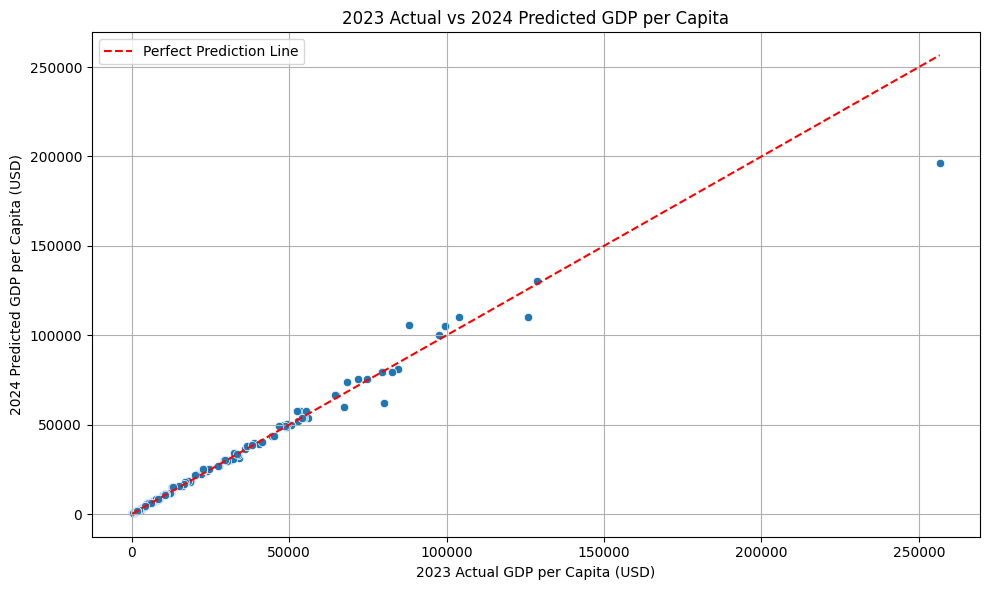

In [25]:
# Plot 1: Scatter Plot (Actual vs Predicted) ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=forecast_df, x='2023 Actual', y='2024 Predicted')
plt.plot([forecast_df['2023 Actual'].min(), forecast_df['2023 Actual'].max()],
         [forecast_df['2023 Actual'].min(), forecast_df['2023 Actual'].max()],
         'r--', label='Perfect Prediction Line')
plt.title('2023 Actual vs 2024 Predicted GDP per Capita')
plt.xlabel('2023 Actual GDP per Capita (USD)')
plt.ylabel('2024 Predicted GDP per Capita (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### **Distribution of target column**

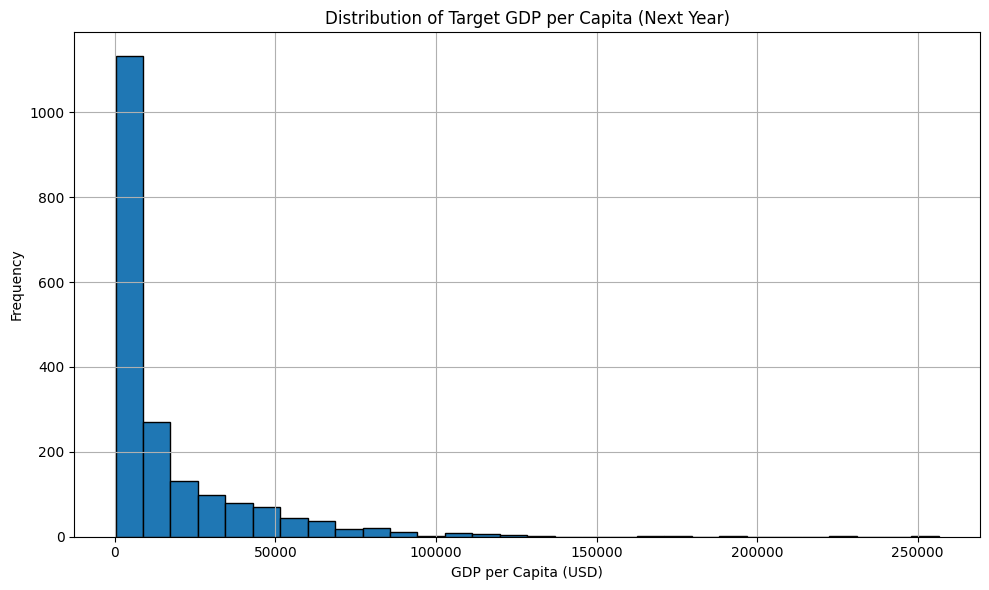

In [26]:
# 2. Histogram of the target variable (y)
plt.figure(figsize=(10, 6))
plt.hist(y, bins=30, edgecolor='black')
plt.title('Distribution of Target GDP per Capita (Next Year)')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

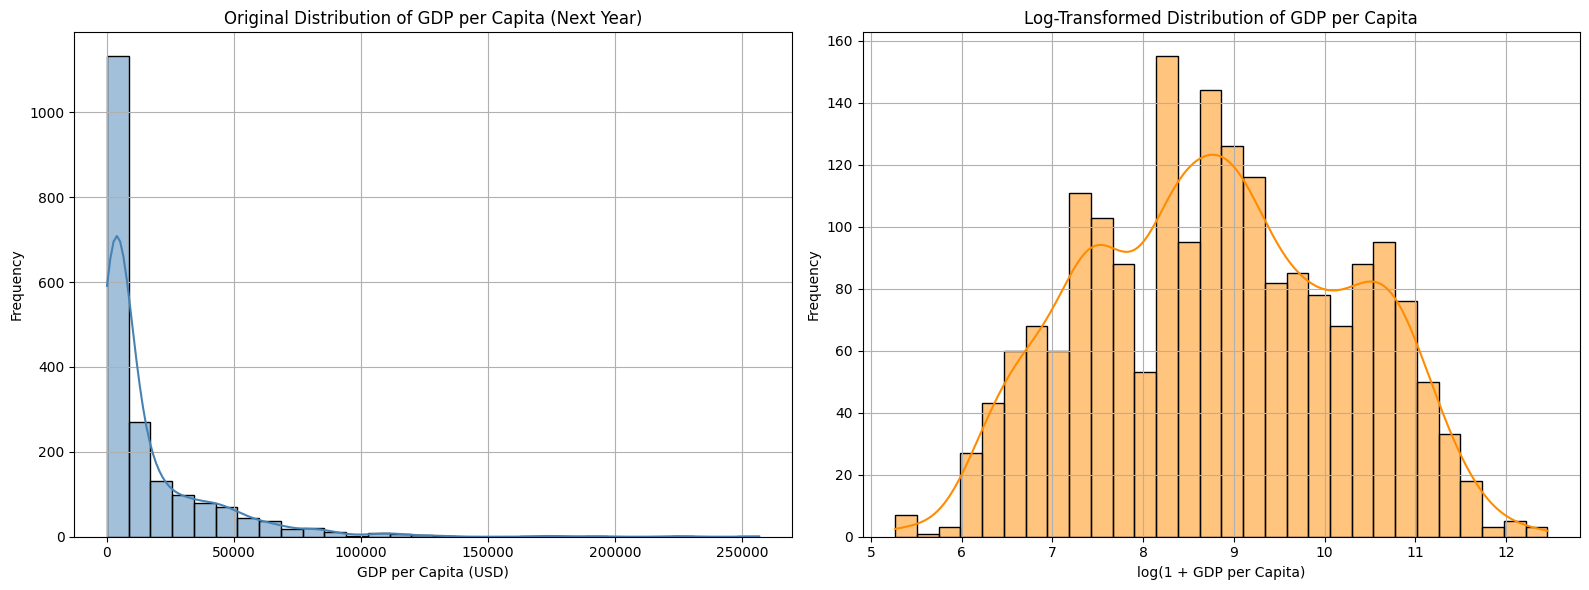

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Raw GDP per capita distribution
sns.histplot(y, bins=30, kde=True, ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_title('Original Distribution of GDP per Capita (Next Year)')
axes[0].set_xlabel('GDP per Capita (USD)')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)

# 2. Log-transformed GDP per capita
log_y = np.log1p(y)  # log1p avoids issues with 0 values
sns.histplot(log_y, bins=30, kde=True, ax=axes[1], color='darkorange', edgecolor='black')
axes[1].set_title('Log-Transformed Distribution of GDP per Capita')
axes[1].set_xlabel('log(1 + GDP per Capita)')
axes[1].set_ylabel('Frequency')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# **Line Chart – GDP per Capita Over Time per Country**

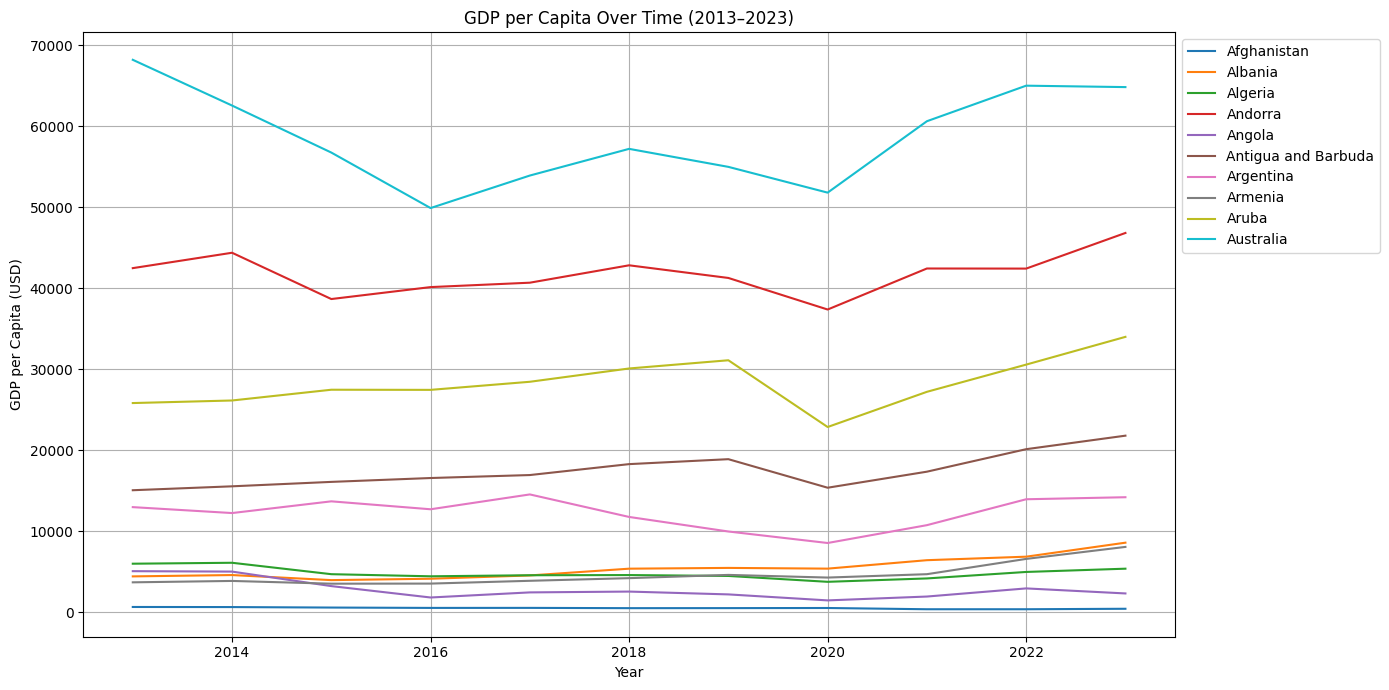

In [28]:
plt.figure(figsize=(14, 7))
sample_countries = gdp_df['Country Name'].unique()[:10]
for country in sample_countries:
    row = gdp_df[gdp_df['Country Name'] == country]
    plt.plot([int(y[:4]) for y in years], row[years].values.flatten(), label=country)
plt.title('GDP per Capita Over Time (2013–2023)')
plt.xlabel('Year')
plt.ylabel('GDP per Capita (USD)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

# **Bar Chart – Forecast for 2024**

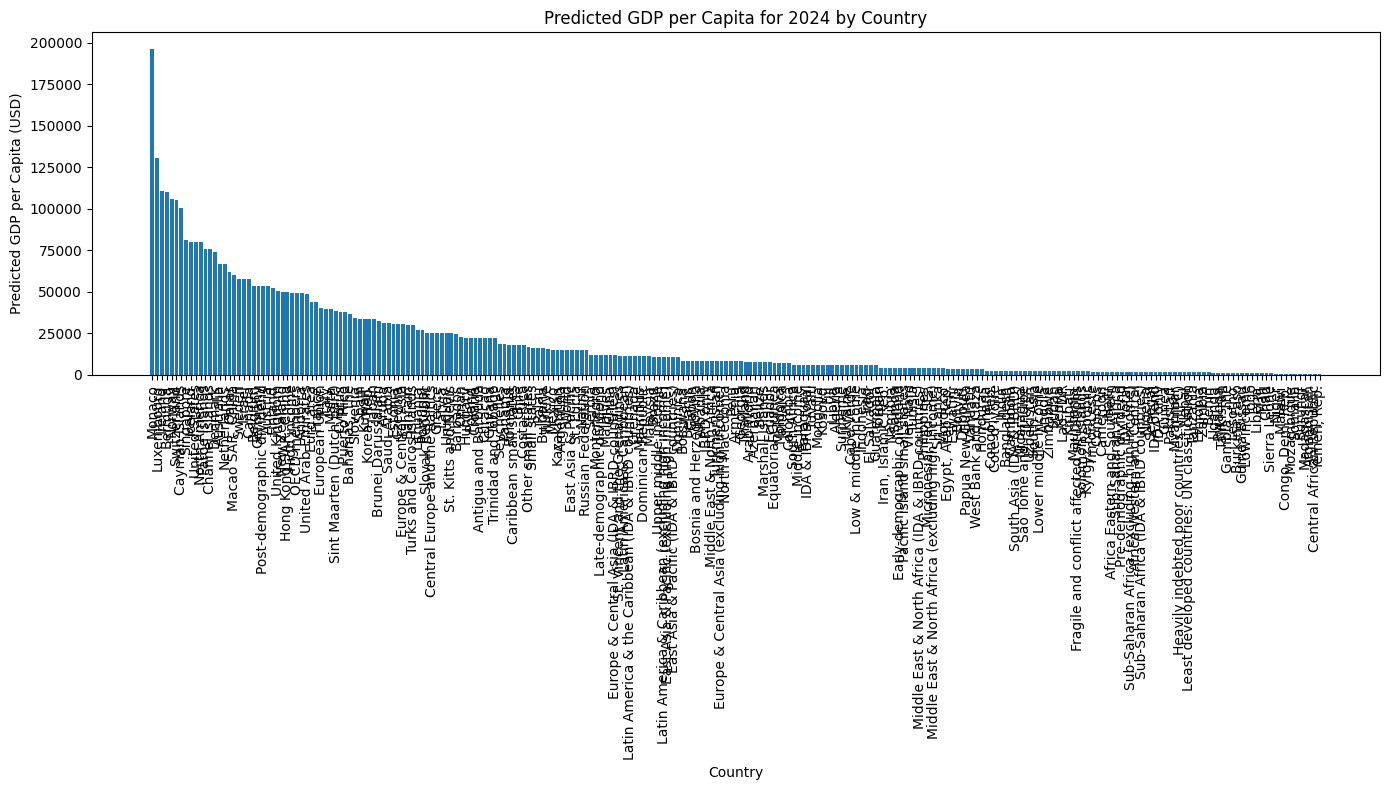

In [29]:
sorted_forecast = forecast_df.sort_values('2024 Predicted', ascending=False)
plt.figure(figsize=(14, 8))
plt.bar(sorted_forecast['Country'], sorted_forecast['2024 Predicted'])
plt.xticks(rotation=90)
plt.title('Predicted GDP per Capita for 2024 by Country')
plt.xlabel('Country')
plt.ylabel('Predicted GDP per Capita (USD)')
plt.tight_layout()
plt.show()

In [30]:
# Add a residual/difference column
forecast_df['Difference (2024 - 2023)'] = forecast_df['2024 Predicted'] - forecast_df['2023 Actual']

# Optional: sort by highest predicted GDP in 2024
comparison_table = forecast_df[['Country', '2023 Actual', '2024 Predicted', 'Difference (2024 - 2023)']]\
    .sort_values('2024 Predicted', ascending=False)\
    .reset_index(drop=True)

In [31]:
comparison_table

,Country,2023 Actual,2024 Predicted,Difference (2024 - 2023)
0,Monaco,256580.515123,196369.062500,-60211.452623
1,Luxembourg,128678.189943,130400.460938,1722.270995
2,Ireland,103887.800388,110467.859375,6580.058987
3,Bermuda,125841.602522,110132.726562,-15708.875960
4,Norway,87925.094419,105530.953125,17605.858706
...,...,...,...,...
238,Burundi,193.007146,599.550598,406.543453
239,Madagascar,506.159369,599.550598,93.391229
240,Afghanistan,415.707417,599.550598,183.843181
241,Central African Republic,495.978897,599.550598,103.571701


In [32]:
comparison_table.describe()

,2023 Actual,2024 Predicted,Difference (2024 - 2023)
count,243.000000,243.000000,243.000000
mean,19039.354135,19063.281250,23.928045
std,28434.626823,26603.992188,4499.963096
min,193.007146,599.550598,-60211.452623
25%,2361.879156,2480.328857,-54.726693
50%,7820.232404,8157.318848,125.173418
75%,22717.803092,24944.265625,601.414354
max,256580.515123,196369.062500,17605.858706
